In [17]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical


In [216]:
# Read in data

dataPath = 'data.csv'

start = time.time()
df = pd.read_csv(dataPath)
end = time.time()
print("Read csv without chunks: ",(end-start),"sec")

# Convert boolean column of booked to int
df["booked"] = df["booked"].astype(int)

# Filter out nan
df = df.dropna()

Read csv without chunks:  0.3351297378540039 sec


In [217]:
# Data overview
df.describe()


,Unnamed: 0,host_is_superhost,accommodates,bathrooms,bedrooms,beds,review_scores_rating,price,booked
count,362370.000000,362370.000000,362370.000000,362370.000000,362370.000000,362370.000000,362370.000000,362370.000000,362370.000000
mean,199642.820225,0.388774,3.354831,1.172696,1.445236,1.867621,4.730517,204.070204,0.685832
std,115380.538023,0.487472,2.259316,0.460526,0.806338,1.313301,0.376637,226.961953,0.464184
min,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.000000,0.000000
25%,98392.250000,0.000000,2.000000,1.000000,1.000000,1.000000,4.650000,90.000000,0.000000
50%,202274.500000,0.000000,2.000000,1.000000,1.000000,1.000000,4.830000,149.000000,1.000000
75%,300156.750000,1.000000,4.000000,1.000000,2.000000,2.000000,4.960000,245.000000,1.000000
max,396179.000000,1.000000,16.000000,7.000000,9.000000,18.000000,5.000000,9994.000000,1.000000


In [218]:
# Noarmalize data and select out target column

target_column = ['booked'] 
index_column = ['Unnamed: 0']
predictors = list(set(list(df.columns))-set(target_column)-set(index_column))
maxes = df[predictors].max()
df[predictors] = df[predictors]/maxes
df.describe()


,Unnamed: 0,host_is_superhost,accommodates,bathrooms,bedrooms,beds,review_scores_rating,price,booked
count,362370.000000,362370.000000,362370.000000,362370.000000,362370.000000,362370.000000,362370.000000,362370.000000,362370.000000
mean,199642.820225,0.388774,0.209677,0.167528,0.160582,0.103757,0.946103,0.020419,0.685832
std,115380.538023,0.487472,0.141207,0.065789,0.089593,0.072961,0.075327,0.022710,0.464184
min,0.000000,0.000000,0.062500,0.000000,0.111111,0.055556,0.200000,0.001001,0.000000
25%,98392.250000,0.000000,0.125000,0.142857,0.111111,0.055556,0.930000,0.009005,0.000000
50%,202274.500000,0.000000,0.125000,0.142857,0.111111,0.055556,0.966000,0.014909,1.000000
75%,300156.750000,1.000000,0.250000,0.142857,0.222222,0.111111,0.992000,0.024515,1.000000
max,396179.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [219]:
# Create test vs train sets
X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

# One hot encode outputs since booked is catagorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

count_classes = y_test.shape[1]

(253659, 7)
(108711, 7)


In [220]:
# Build model

model = Sequential()
model.add(Dense(500, activation='relu', input_dim=7))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])



In [221]:
# Train

model.fit(X_train, y_train, epochs=20, batch_size=50)

Epoch 1/20
5074/5074 [==============================] - 13s 2ms/step - loss: 0.6128 - accuracy: 0.6894
Epoch 2/20
5074/5074 [==============================] - 13s 3ms/step - loss: 0.6082 - accuracy: 0.6927
Epoch 3/20
5074/5074 [==============================] - 12s 2ms/step - loss: 0.6059 - accuracy: 0.6942
Epoch 4/20
5074/5074 [==============================] - 12s 2ms/step - loss: 0.6047 - accuracy: 0.6953
Epoch 5/20
5074/5074 [==============================] - 14s 3ms/step - loss: 0.6041 - accuracy: 0.6955
Epoch 6/20
5074/5074 [==============================] - 14s 3ms/step - loss: 0.6033 - accuracy: 0.6965
Epoch 7/20
5074/5074 [==============================] - 13s 3ms/step - loss: 0.6031 - accuracy: 0.6965
Epoch 8/20
5074/5074 [==============================] - 13s 2ms/step - loss: 0.6026 - accuracy: 0.6969
Epoch 9/20
5074/5074 [==============================] - 12s 2ms/step - loss: 0.6021 - accuracy: 0.6975
Epoch 10/20
5074/5074 [==============================] - 12s 2ms/step - l

In [222]:
# Evaluate

pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1])) 




Accuracy on training data: 0.7022814154624939% 
 Error on training data: 0.2977185845375061
Accuracy on test data: 0.7018700838088989% 
 Error on test data: 0.2981299161911011


In [223]:
# print(X_test)

test = model.predict(X_test)


In [232]:
notbooked = []

for answer in test:
    if answer[0] > answer[1]:
        notbooked.append(answer)
    
print("Percent of predicted not booked entries: ",len(notbooked)/len(test))

numNotBookedTest = 0

print(len(y_test))

for item in y_test:
    if item[0] > item[1]:
        numNotBookedTest += 1

print("Percent of not booked entries in testing: ",numNotBookedTest/len(y_test))





Percent of predicted not booked entries:  0.05549576399812346
108711
Percent of not booked entries in testing:  0.3144759959893663


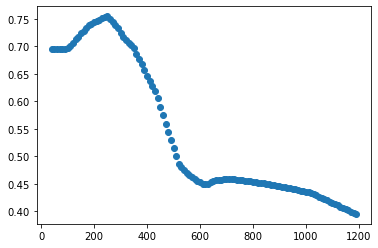

In [233]:
# Analysis of how price is being modeled

# Sample property
# host_is_superhost	accommodates	bathrooms	bedrooms	beds	review_scores_rating	price	

# Build test set

properties = np.array([[0, 2, 1, 1, 1, 4.9, 40]])

for price in range(50, 1200, 10):
    properties = np.vstack([properties, [0, 2, 1, 1, 1, 4.9, price]])

# print(properties) 
# sampleProperty = np.array([[0, 2, 1, 1, 1, 4.9, 150]])
samplePropertyDf = pd.DataFrame({'host_is_superhost': properties[:, 0], 'accommodates': properties[:, 1], 'bathrooms': properties[:, 2], 'bedrooms': properties[:, 3], 'beds': properties[:, 4], 'review_scores_rating': properties[:, 5], 'price': properties[:, 6]})

# Normalize
samplePropertyDf[predictors] = samplePropertyDf[predictors]/maxes

# print(samplePropertyDf[predictors])

test = model.predict(samplePropertyDf[predictors])

# print(test)

plt.scatter(properties[:,6],test[:,1])
plt.show()

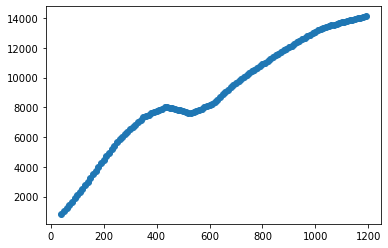

In [234]:
# Revenue

plt.scatter(properties[:,6],(test[:,1]*30)*properties[:,6])
plt.show()

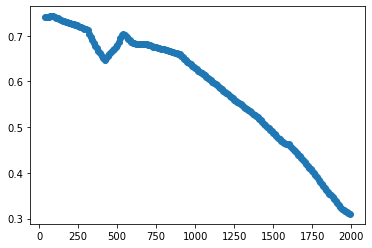

In [237]:
# Analysis of how price is being modeled

# Sample property
# host_is_superhost	accommodates	bathrooms	bedrooms	beds	review_scores_rating	price	

# Build test set

properties = np.array([[0, 6, 2, 4, 4, 4.5, 40]])

for price in range(50, 2000, 10):
    properties = np.vstack([properties, [0, 6, 2, 4, 4, 4.5, price]])

# print(properties) 
# sampleProperty = np.array([[0, 2, 1, 1, 1, 4.9, 150]])
samplePropertyDf = pd.DataFrame({'host_is_superhost': properties[:, 0], 'accommodates': properties[:, 1], 'bathrooms': properties[:, 2], 'bedrooms': properties[:, 3], 'beds': properties[:, 4], 'review_scores_rating': properties[:, 5], 'price': properties[:, 6]})

# Normalize
samplePropertyDf[predictors] = samplePropertyDf[predictors]/maxes

# print(samplePropertyDf[predictors])

test = model.predict(samplePropertyDf[predictors])

# print(test)

plt.scatter(properties[:,6],test[:,1])
plt.show()

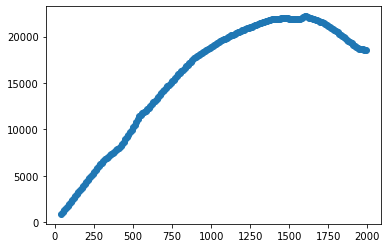

In [238]:
# Revenue

plt.scatter(properties[:,6],(test[:,1]*30)*properties[:,6])
plt.show()

In [ ]:
# Beg of distance math

# # Function to get distance value of a cord from a reference cord, the reference cord will be max val and the further away the quicker it drops off
# import math

# def calcDistance(refLat, refLng, targetLat, targetLng):
#     R = 6371e3 #metres
#     φ1 = targetLat * math.pi/180 # φ, λ in radians
#     φ2 = refLat * math.pi/180
#     Δφ = (refLat-targetLat) * math.pi/180
#     Δλ = (refLng-targetLng) * math.pi/180

#     a = math.sin(Δφ/2) * math.sin(Δφ/2) + math.cos(φ1) * math.cos(φ2) * math.sin(Δλ/2) * math.sin(Δλ/2)
#     c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

#     d = R * c #in metres
#     return d

In [363]:
# Function that takes in a state, decides what the reward is, and returns it
import random

#State = [host_is_superhost(0-1),accommodates(0-n),bathrooms(0-n),bedrooms(0-n),beds(0-n),review_scores_rating(0-5),price(0-n)]
def getReward(state):
    propertyFromState = np.array([state])
    
    # Normalize
    propertyFromDf = pd.DataFrame({'host_is_superhost': propertyFromState[:, 0], 'accommodates': propertyFromState[:, 1], 'bathrooms': propertyFromState[:, 2], 'bedrooms': propertyFromState[:, 3], 'beds': propertyFromState[:, 4], 'review_scores_rating': propertyFromState[:, 5], 'price': propertyFromState[:, 6]})
    propertyFromDf[predictors] = propertyFromDf[predictors]/maxes

    #Predict
    bookingConfidence = model.predict(propertyFromDf[predictors])
    
#     print("Chance the property is booked",bookingConfidence[0][1])
    
    #Get random chance, if below booking confidence say the property is booked and return the price it was booked for, otherwise 0
    chance = random.uniform(0, 1)
#     print(chance)
    if chance < bookingConfidence[0][1]:
        return state[len(state)-1]  
    return 0

print(getReward([1,2,1,1,1,5,200]))

Chance the property is booked 0.7892363
0.05594340283458932
200
